In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/ebojackson/Library/CloudStorage/OneDrive-Personal/Documents/" \
                 "My Python/FreeCodeCamp/data-analysis-with-python/projects/fcc-forum-pageviews.csv", \
                 parse_dates=["date"], index_col="date")


Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
The label on the x axis should be Date and the label on the y axis should be Page Views.

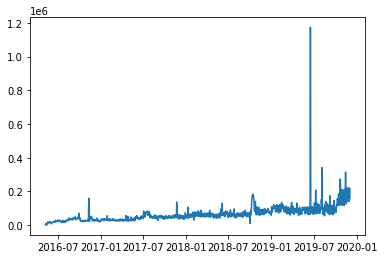

In [3]:
plt.plot(df["value"])

In [4]:
df = df.drop(df[df["value"] < df["value"].quantile(0.025)].index)

In [5]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [6]:
df = df.drop(df[df["value"] > df["value"].quantile(0.975)].index)


In [7]:
df


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


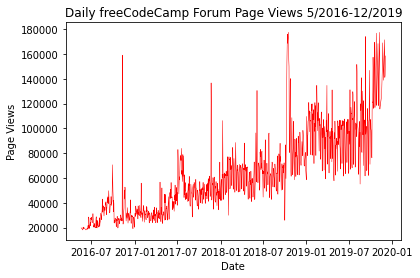

In [8]:
#df = df.set_index("date")

#option 1
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.plot(df.index, df["value"], "r", linewidth=0.5)

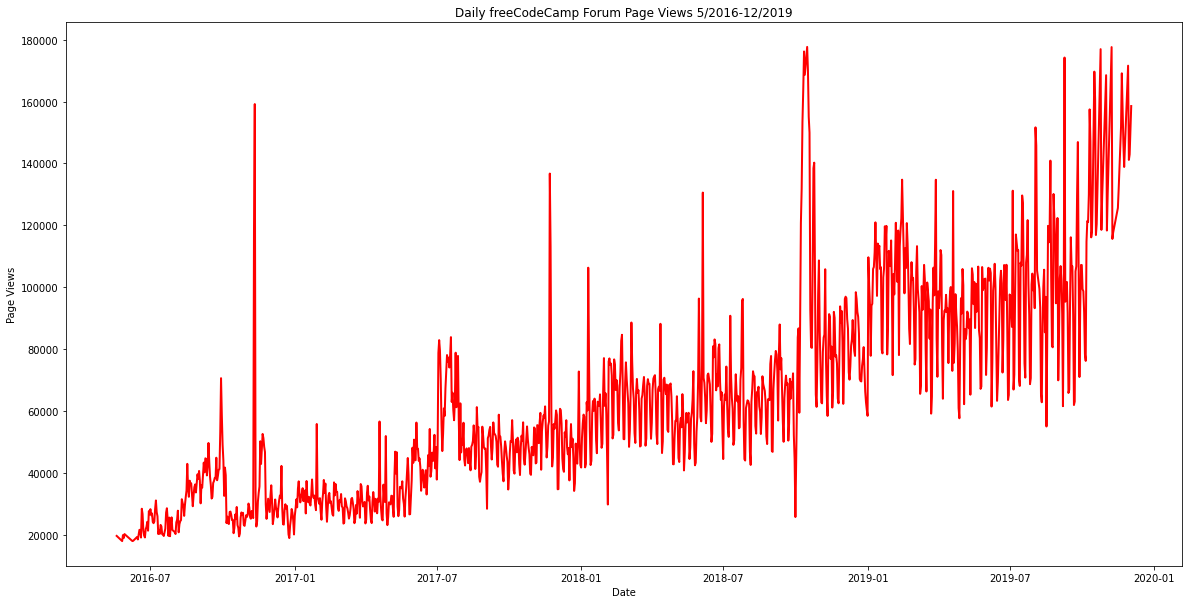

In [9]:
#df = df.set_index("date")

#option 2
fig, graph1 = plt.subplots(figsize=(20,10))
graph1.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
graph1.set_xlabel("Date")
graph1.set_ylabel("Page Views")
graph1.plot(df.index, df["value"], "r", linewidth=2)

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
It should show average daily page views for each month grouped by year. 
The legend should show month labels and have a title of Months. 
On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [10]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [11]:
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"]).mean()
df_bar


value
year month               
2016 5       19432.400000
     6       21875.105263
     7       24109.678571
     8       31049.193548
     9       41476.866667
     10      27398.322581
     11      40448.633333
     12      27832.419355
2017 1       32785.161290
     2       31113.071429
     3       29369.096774
     4       30878.733333
     5       34244.290323
     6       43577.500000
     7       65806.838710
     8       47712.451613
     9       47376.800000
     10      47438.709677
     11      57701.566667
     12      48420.580645
2018 1       58580.096774
     2       65679.000000
     3       62693.774194
     4       62350.833333
     5       56562.870968
     6       70117.000000
     7       63591.064516
     8       62831.612903
     9       65941.733333
     10     113663.275862
     11      78688.333333
     12      80047.483871
2019 1      102056.516129
     2      105968.357143
     3       91214.483871
     4       89368.433333
     5       91439.903226
     6       90435.642857
     7       97236.566667
     8      102717.310345
     9       97268.833333
     10     122802.272727
     11     143166.428571
     12     150733.500000

<AxesSubplot:xlabel='year,month'>

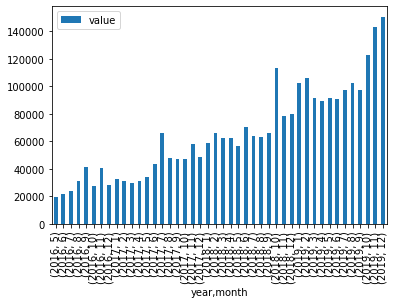

In [12]:

df_bar.plot(kind="bar")


In [13]:
type(df_bar.unstack())


pandas.core.frame.DataFrame

<AxesSubplot:xlabel='year'>

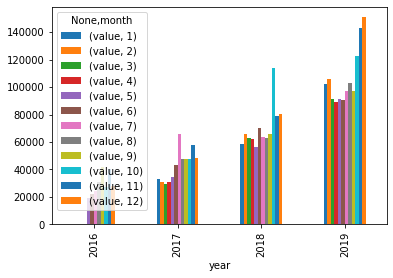

In [14]:

df_bar.unstack().plot(kind="bar")

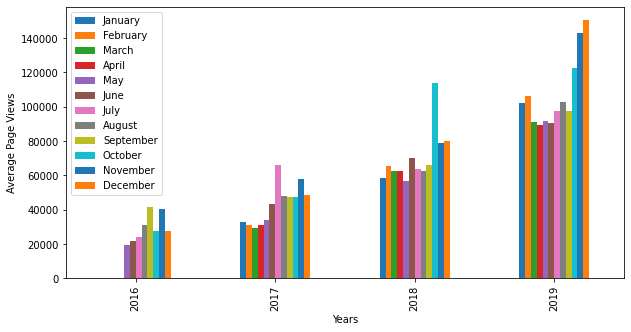

In [15]:
fig = df_bar.unstack().plot.bar(figsize=(10,5), xlabel="Years", ylabel="Average Page Views", legend=True)
plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

In [16]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box


,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1234,2019-11-24,138875,Nov,2019
1235,2019-11-29,171584,Nov,2019
1236,2019-11-30,141161,Nov,2019
1237,2019-12-01,142918,Dec,2019


In [17]:
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

Text(0, 0.5, 'Page Views')

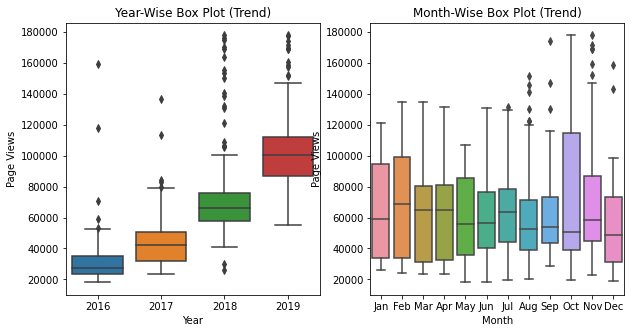

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax = ax1)
ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax = ax2)

ax1.set_title("Year-Wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")


ax2.set_title("Month-Wise Box Plot (Trend)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")

